In [41]:
import cv2

In [42]:
image = cv2.imread('img1.jpeg')

In [43]:
image = cv2.resize(image, (512, 512))[:,:,0]

In [44]:
import matplotlib.pyplot as plt

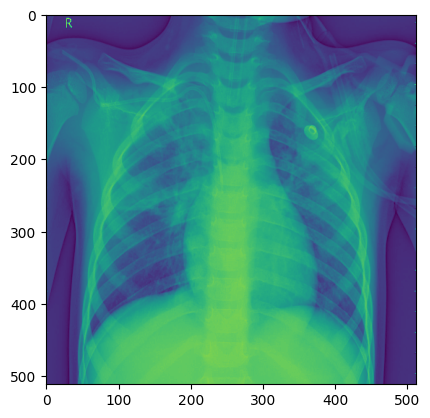

In [45]:
plt.imshow(image)

In [46]:
image.shape

(512, 512)

In [47]:
newImage = image.reshape(1, 512, 512, 1)

In [48]:
newImage.shape

(1, 512, 512, 1)

In [49]:
from tensorflow.keras import layers, Model

channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def Pmodel():
    img_input = layers.Input(shape = (224, 224, 1))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model

In [50]:
model = unet(input_size=(512,512,1))

In [51]:
model.load_weights('bestMaskWeights.hdf5')

In [52]:
mask = model.predict(newImage).reshape(512, 512)

1/1 [==============================] - 1s 771ms/step


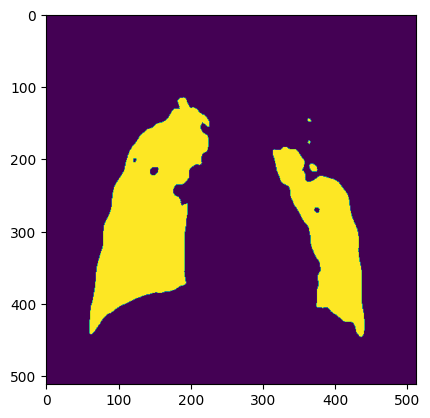

In [53]:
plt.imshow(mask)

In [54]:
image[mask==0]=0

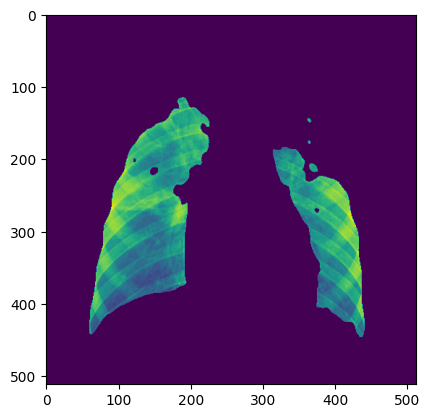

In [55]:
plt.imshow(image)

In [56]:
image.shape

(512, 512)

In [57]:

image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_CUBIC).reshape(1, 224, 224, 1)

In [58]:
import numpy as np
image = image.astype(np.float32)/255.

In [59]:
image.shape

(1, 224, 224, 1)

In [60]:
from keras import layers, Model, backend
channel_axis = -1# if backend.image_data_format() == 'channels_first' else -1
def model():
    img_input = layers.Input(shape = (224, 224, 1))
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv1')(img_input)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn1')(x)
    x = layers.Activation('relu', name = 'block1_act1')(x)
    x = layers.Conv2D(32, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block1_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block1_bn2')(x)
    x = layers.Activation('relu', name = 'block1_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block1_pool')(x)

    # block 2
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn1')(x)
    x = layers.Activation('relu', name = 'block2_act1')(x)
    x = layers.Conv2D(64, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block2_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block2_bn2')(x)
    x = layers.Activation('relu', name = 'block2_act2')(x)
    x = layers.MaxPooling2D((2, 2),
                            strides=(2, 2),
                            padding='same',
                            name='block2_pool')(x)

    # block 3
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn1')(x)
    x = layers.Activation('relu', name = 'block3_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block3_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block3_bn2')(x)
    x = layers.Activation('relu', name = 'block311_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block3_pool')(x)

    x = layers.Conv2D(256, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn1')(x)
    x = layers.Activation('relu', name = 'block31_act1')(x)
    x = layers.Conv2D(128, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block31_conv2')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block31_bn2')(x)
    x = layers.Activation('relu', name = 'block31_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block31_pool')(x)

  # block 4
    x = layers.Conv2D(1024, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv1')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block41_bn1')(x)
    x = layers.Activation('relu', name = 'block41_act1')(x)
    x = layers.Conv2D(512, (3,3),
                      padding = 'same', use_bias = False,
                      name = 'block41_conv2')(x)
    x = layers.Dropout(0.5, name = 'block4_dropout')(x)
    x = layers.BatchNormalization(axis = channel_axis, name = 'block4_bn2')(x)
    x = layers.Activation('relu', name = 'block4_act2')(x)
    x = layers.MaxPooling2D((3, 3),
                            strides=(3, 3),
                            padding='same',
                            name='block4_pool')(x)
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(512, activation='relu', name='fc1')(x)
    x = layers.Dense(1024, activation='relu', name='fc11')(x)
    x = layers.Dense(512, activation='relu', name='fc3')(x)
    x = layers.Dense(512, activation='relu', name='fc4')(x)
    x = layers.Dense(256, activation='relu', name='fc5')(x)
    x = layers.Dense(64, activation='relu', name='fc6')(x)
    x = layers.Dense(2, activation='softmax', name='predictions')(x)
    model = Model(inputs=img_input, outputs=x, name = 'own_build_model')
    return model
pmodel = model()
pmodel.load_weights('pneumonia.hdf5')
pmodel.summary()

Model: "own_build_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 32)      288       
                                                                 
 block1_bn1 (BatchNormalizat  (None, 224, 224, 32)     128       
 ion)                                                            
                                                                 
 block1_act1 (Activation)    (None, 224, 224, 32)      0         
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 32)      9216      
                                                                 
 block1_bn2 (BatchNormalizat  (None, 224, 224, 32)     128       
 ion)                                              

In [61]:
pmodel.predict(image)

1/1 [==============================] - 0s 237ms/step


array([[0.0498506, 0.9501494]], dtype=float32)

In [62]:
import visualkeras

In [63]:
visualkeras.layered_view(model, legend=True, draw_funnel=True)

AttributeError: 'function' object has no attribute 'layers'

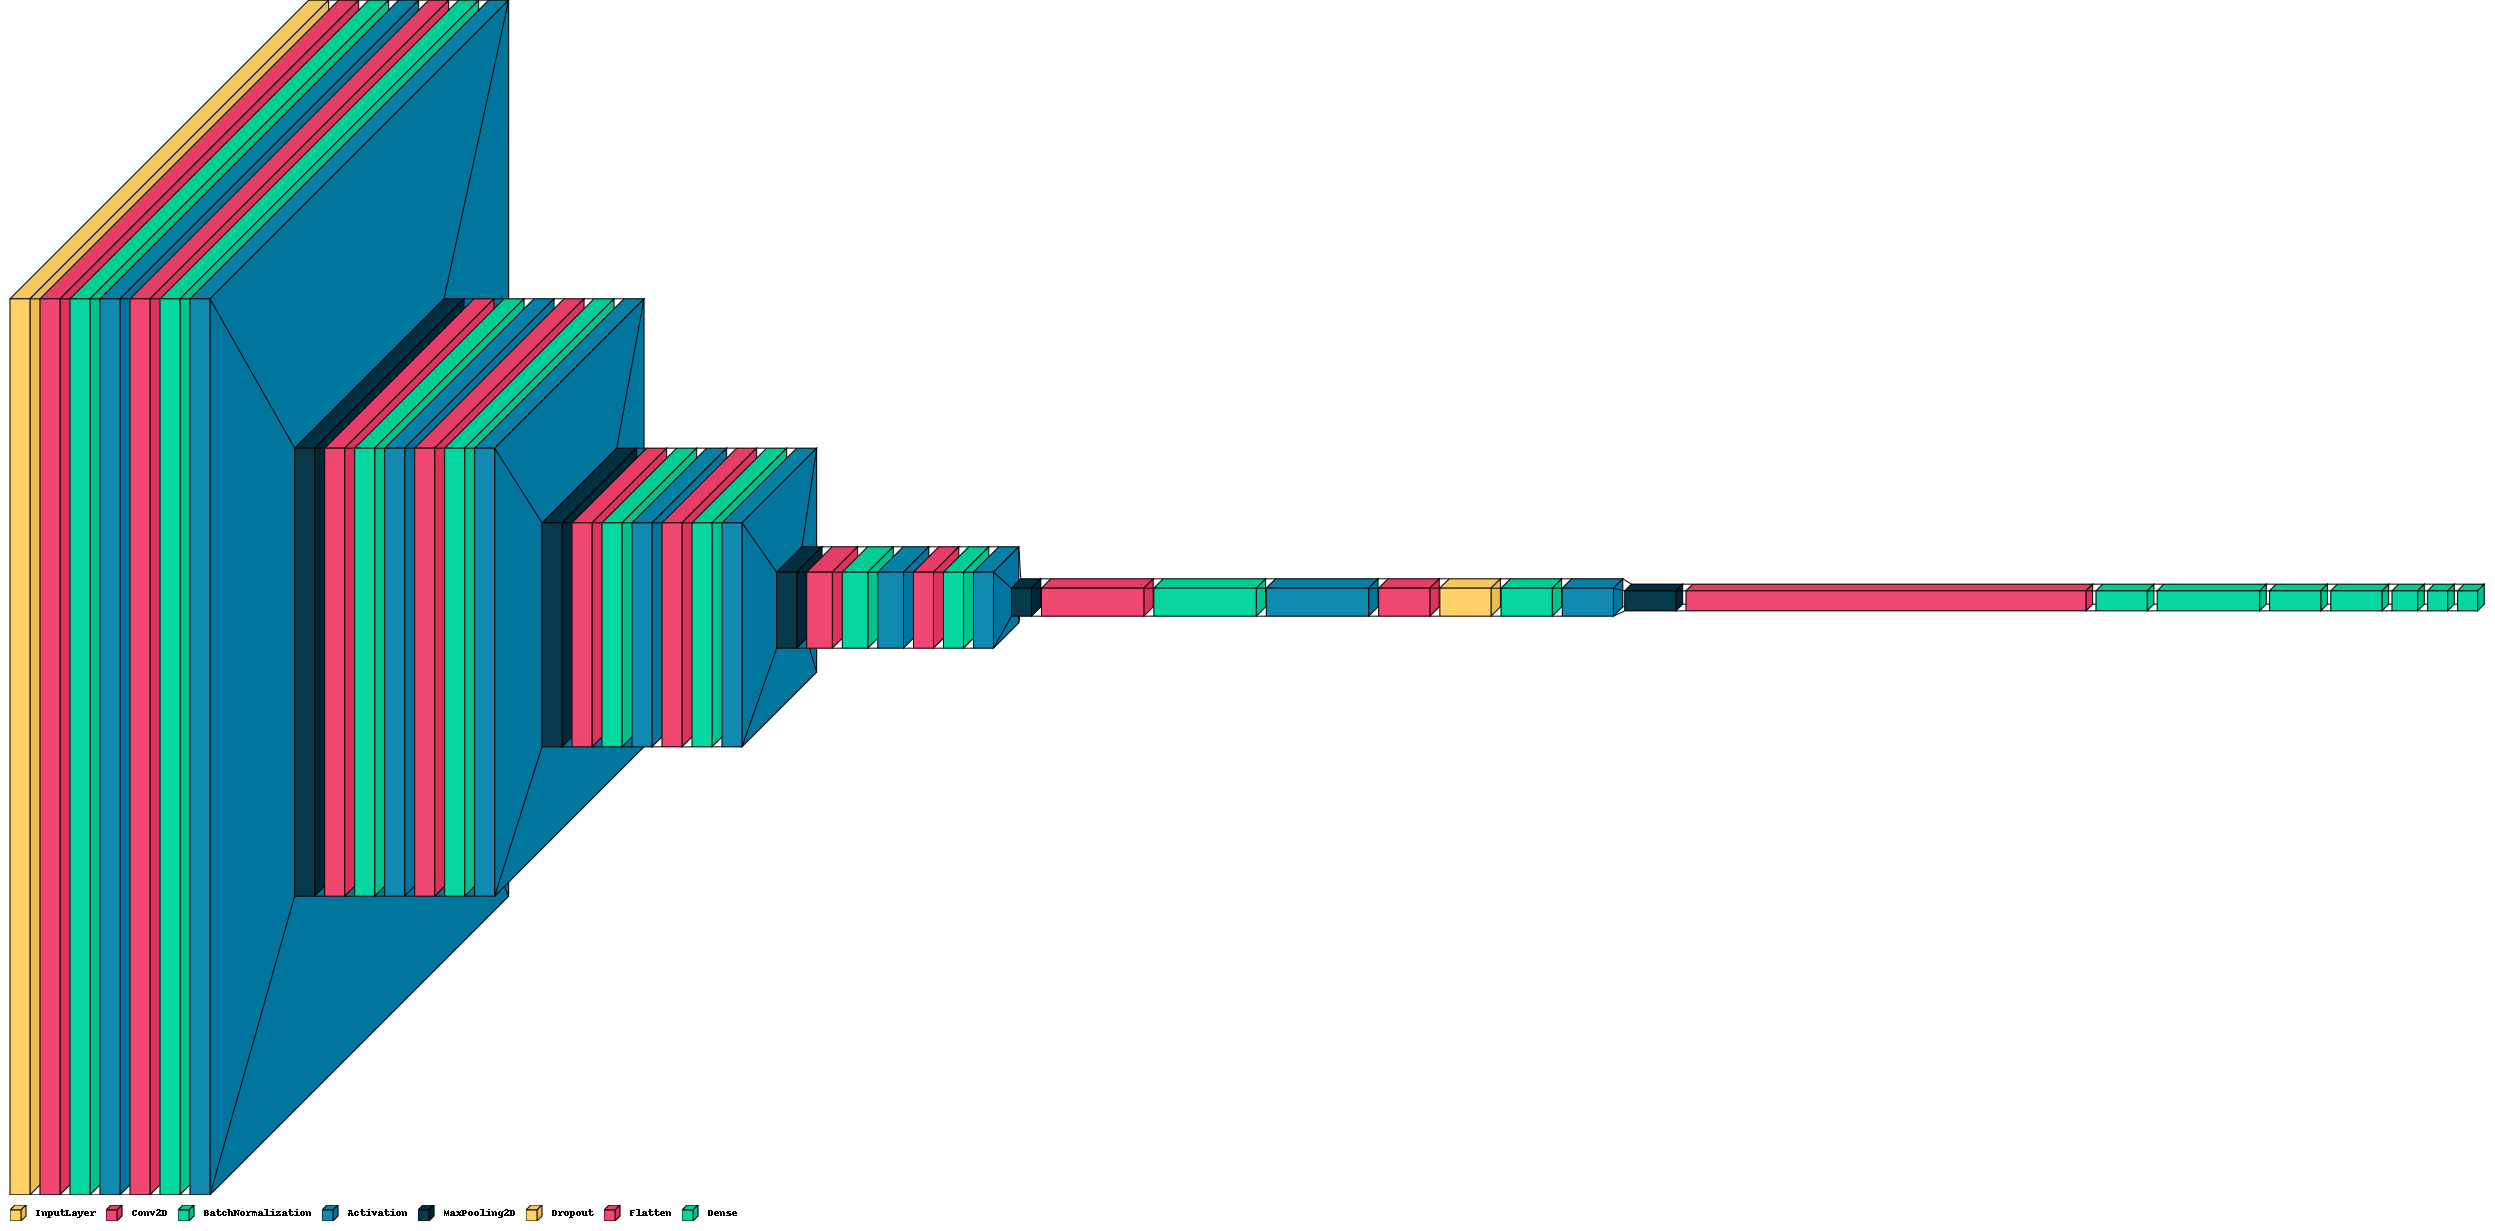

In [64]:
visualkeras.layered_view(pmodel, legend=True, draw_funnel=True)